<a href="https://colab.research.google.com/github/hosngholami/RecommenderSystem/blob/main/RecommenderSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install opendatasets
!pip install geopy
!pip install folium
!pip install -U pymoo
!pip install scikit-

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=23a2ff69f7d9e062b4ccbc1fa3f530c05136892e6e85f581d3ff63de9ffc00f0
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme
ERROR: Invalid requirement: 'scikit-': Expected end or semicolon (after name and no valid version specifier)
    scikit-
          ^


In [4]:
import pandas as pd
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors

In [5]:
user = pd.read_csv('/content/drive/MyDrive/Tourism/csv/User.csv')
transaction = pd.read_csv('/content/drive/MyDrive/Tourism/csv/Transaction.csv')

In [6]:
transaction["LocationId"] = 0

In [7]:
hotel = pd.read_csv('/content/drive/MyDrive/Shiraz/hotel.csv')

historic =  pd.read_csv('/content/drive/MyDrive/Shiraz/historic.csv')
museum = pd.read_csv('/content/drive/MyDrive/Shiraz/museum.csv')
park = pd.read_csv('/content/drive/MyDrive/Shiraz/park.csv')
resturant = pd.read_csv('/content/drive/MyDrive/Shiraz/resturant.csv')

In [ ]:
for i in range(len(hotel)):
  hotel.loc[i, 'id'] = i + 1000

hotel.to_csv('/content/drive/MyDrive/Shiraz/hotel.csv')

In [ ]:
for i in range(len(historic)):
  historic.loc[i, 'id'] = i + 2000

historic.to_csv('/content/drive/MyDrive/Shiraz/historic.csv')

In [ ]:
for i in range(len(museum)):
  museum.loc[i, 'id'] = i + 3000

museum.to_csv('/content/drive/MyDrive/Shiraz/museum.csv')

In [ ]:
for i in range(len(resturant)):
  resturant.loc[i, 'id'] = i + 4000

resturant.to_csv('/content/drive/MyDrive/Shiraz/resturant.csv')

In [ ]:
for i in range(len(park)):
  park.loc[i, 'id'] = i + 5000

park.to_csv('/content/drive/MyDrive/Shiraz/park.csv')

In [8]:
locations = pd.concat([historic, museum, park, resturant])

In [9]:
samples = locations[["Latitude", "Longitude", "id"]]
samples

,Latitude,Longitude,id
0,29.754301,52.426041,2000
1,29.752250,52.403587,2001
2,29.645372,52.515722,2002
3,29.594763,52.543906,2003
4,29.594812,52.543768,2004
...,...,...,...
202,29.593724,52.481380,4202
203,29.622126,52.531432,4203
204,29.623901,52.548126,4204
205,29.621353,52.505522,4205


In [10]:
def similarity(source, destination):
    return np.sqrt(np.sum((np.array(source) - np.array(destination))**2))

def getSimilarity(source):

  distances = []

  for i in range(len(samples)-1):
      latitude = samples.iloc[i]['Latitude']
      longitude = samples.iloc[i]['Longitude']
      id = samples.iloc[i]['id']
      destination = [latitude, longitude]
      distances.append(
          {"id": int(id), "distance": similarity(source, destination)}
        )

  distances_sorted = sorted(distances, key=lambda x: x["distance"])

  return distances_sorted[:50]

In [ ]:
groups = transaction.groupby("UserId")

locationId = []


for name, group in groups:

  index = random.randint(0, len(locations)-1)

  latitude = locations.iloc[index]['Latitude']
  longitude = locations.iloc[index]['Longitude']
  source = [latitude, longitude]

  similarty = getSimilarity(source)


  for i in range(len(group)-1):
      locationId.append(similarty[i]['id'])


transaction["LocationId"] = locationId


transaction.to_csv('/content/drive/MyDrive/Tourism/csv/Transaction1.csv')





In [17]:
for i in range(len(transaction)):
  index = random.randint(0, len(locations)-1)
  id = locations.iloc[index]['id']
  transaction.loc[i, 'LocationId'] = id

In [19]:
transaction.to_csv('/content/drive/MyDrive/Tourism/csv/Transaction.csv')

enter mt: 12
route: [   6  922   43  953 1075  425 1088  774   74 1181  920    6] -> d: 99.64555307279564, c: 431
route: [   6  835 1432  805  306  106  697   23  712  473  199    6] -> d: 84.80017530110916, c: 551
route: [   6 1024   41  295  801  382 1113  625 1163  521 1394    6] -> d: 76.99889783789531, c: 545
route: [   6 1107  503  180 1214  266 1380 1126   95  861  262    6] -> d: 65.67620754710589, c: 611
route: [   6  645  667  756  851  282 1140  824   92 1306  134    6] -> d: 110.88402481612555, c: 616
route: [   6  110   82 1372 1423  956  267 1119  240  533  511    6] -> d: 94.37644757990674, c: 541
route: [   6  740  541 1329  427 1330  537  455  469   79 1280    6] -> d: 58.450946515138014, c: 592
route: [   6  637  269  381  203  232  976  297  249  831 1356    6] -> d: 67.75225409183317, c: 508
route: [   6   32  543  978   25  940  782 1007  717  102  821    6] -> d: 180.97199983421993, c: 474
route: [   6 1452  715  777 1381  750 1375 1198  965  533  472    6] -> d: 

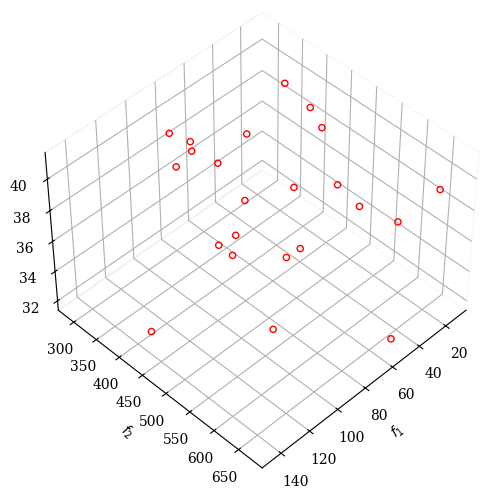

In [ ]:
import random
import numpy as np
import folium

from pymoo.core.crossover import Crossover
from pymoo.core.problem import Problem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.population import Population
from pymoo.core.crossover import Crossover
from pymoo.operators.selection.rnd  import RandomSelection
from pymoo.core.sampling import Sampling
from geopy.distance import geodesic
from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim
from pymoo.core.callback import Callback
from pymoo.operators.selection.tournament import TournamentSelection
from pymoo.core.selection import Selection
from pymoo.visualization.scatter import Scatter
from pymoo.core.mutation import Mutation

withoutHotel = scinecSpot[scinecSpot["type"] != 'r']
def repairSolution(solution):
   solution = [int(row) for row in solution]
   countResturant = 0



   for i in range(1, len(solution)-1):
      node = solution[i]
      s = scinecSpot[scinecSpot["id"] == node]
      typeScinecSpot = s.iloc[0]["type"]
      if((typeScinecSpot == "r")):
        countResturant += 1

      if((typeScinecSpot == "r") and (countResturant > 1)):
         ss = withoutHotel.sample(n=1)
         solution[i] = ss.iloc[0]["id"]

   return solution


def isValidSolution(solution):
   solution = [int(row) for row in solution]
   countResturant = 0

   for i in range(1, len(solution)-1):
      node = solution[i]
      s = scinecSpot[scinecSpot["id"] == node]

      if((s.iloc[0]["type"] == "r")):
        countResturant += 1

   if(countResturant > 1 ):
      return False

   return True




def createSolution(n_var):
    sample = [0 for _ in range(n_var)]

    sample[0] = h1.iloc[0]["id"]
    for i in range(1,n_var-1):
      s = scinecSpot.sample(n=1)
      sample[i] = s.iloc[0]["id"]
    sample[n_var-1] = h1.iloc[0]["id"]

    return sample


class ValidatePopulationCallback(Callback):
    def __init__(self):
        super().__init__()
        self.history = []  # نگه‌داشتن تاریخچه جمعیت‌های معتبر

    def notify(self, algorithm):
        # ترکیب والدین و فرزندان
        combined_population = np.vstack([algorithm.pop.get("X"), algorithm.off.get("X")])

        # اصلاح جمعیت جدید
        new_population = np.zeros_like(combined_population)  # جمعیت جدید اصلاح‌شده

        for i in range(len(combined_population)):
            # اصلاح هر فرد از جمعیت
            individual = combined_population[i]

            # اصلاح فرد با استفاده از روش‌های مورد نظر (مثلاً ایجاد یک راه‌حل معتبر)
            # فرض کنید تابع اصلاحی createValidSolution این کار را انجام می‌دهد
            individual = self.repair_individual(individual)

            # اصلاح فرد در جمعیت جدید
            new_population[i] = individual
        F = np.zeros((new_population.shape[0], algorithm.problem.n_obj))
        algorithm.problem._evaluate(new_population, out={"F": F})




        # به روز رسانی جمعیت با جمعیت اصلاح‌شده
        # اطمینان از هم‌خوانی اندازه جمعیت
        if new_population.shape[0] == algorithm.pop.size:
            algorithm.pop.set("X", new_population)
        else:
            # اگر تعداد تغییر کرده، تعداد جمعیت را مطابق با نیاز تنظیم کنید
            algorithm.pop.set("X", new_population[:algorithm.pop.size])


    def repair_individual(self, individual):
        if(isValidSolution(individual) == False):
            individual = repairSolution(individual)


        return individual




class CustomMutation(Mutation):
    def _do(self, problem, X, **kwargs):
      return X

class TournamentSelection(Selection):
    def __init__(self, tournament_size=2):
        super().__init__()
        self.tournament_size = tournament_size

    def _do(self, problem, pop, n_select, n_parents=1, **kwargs):
        selected = np.full((n_select, n_parents), -1, dtype=int)

        for i in range(n_select):
            for j in range(n_parents):
                # انتخاب کاندیداها به صورت تصادفی
                candidates = np.random.choice(len(pop), self.tournament_size, replace=False)

                # مقایسه کاندیداها بر اساس fitness (مقدار F)
                best = candidates[np.argmin([pop[c].F[0] for c in candidates])]
                selected[i, j] = best

        return selected




class CustomSampling(Sampling):
    def _do(self, problem, n_samples, **kwargs):
        n_var = problem.n_var  # تعداد متغیرها
        xl = problem.xl        # حد پایین متغیرها
        xu = problem.xu        # حد بالا متغیرها
        samples = np.zeros([n_samples, n_var], dtype=int)

        for row in range(len(samples)):
            samples[row] = createSolution(n_var)


        # print("Initial Population:")
        # print(samples)

        # print('---------------------')

        return samples


def getObjective(routes):
    total_distance = []
    total_cost = []
    total_rate = []


    for route in routes:


        route = route.astype(int)
        distance = 0
        cost = 0
        rate = 0

        start_lat = h1.iloc[0]["latitude"]
        start_lon = h1.iloc[0]["longitude"]


        end = scinecSpot[scinecSpot["id"] == route[1]]
        end_lat = end.iloc[0]["latitude"]
        end_lon = end.iloc[0]["longitude"]

        distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)

        for i in range(1, len(route) - 2):
            start, end = int(route[i]), int(route[i + 1])

            start = scinecSpot[scinecSpot["id"] == start]
            end = scinecSpot[scinecSpot["id"] == end]

            start_lat, start_lon = start.iloc[0]["latitude"], start.iloc[0]["longitude"]
            end_lat, end_lon = end.iloc[0]["latitude"], end.iloc[0]["longitude"]


            distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)

        for i in range(1, len(route) - 1):
          node = scinecSpot[scinecSpot["id"] == route[i]]
          rate +=  node.iloc[0]["stars"]

        start_lat = h1.iloc[0]["latitude"]
        start_lon = h1.iloc[0]["longitude"]

        for i in range(1, len(route)-1):
            start = scinecSpot[scinecSpot["id"] == route[i]]
            cost += start.iloc[0]["price"]

        end = scinecSpot[scinecSpot["id"] == route[-1]]
        end_lat = end.iloc[0]["latitude"]
        end_lon = end.iloc[0]["longitude"]

        distance += np.float64(geodesic((start_lat, start_lon), (end_lat, end_lon)).km)



        print(f"route: {route} -> d: {distance}, c: {cost}")
        total_distance.append(distance)
        total_cost.append(cost)
        total_rate.append(rate)

    return (total_distance, total_cost, total_rate)


# مدل و الگوریتم NSGA-II
class HotelRouteProblem(Problem):
    def __init__(self, n_var):
        super().__init__(n_var=n_var,
                         n_obj=3,
                         n_constr=0,
                         xl=0,
                         xu=locations - 1,
                         type_var=int)



    def _evaluate(self, x, out, *args, **kwargs):
        total_distance, total_cost, total_rate = getObjective(x)
        # for i in range(len(total_distance)):
        #     print(f"total_distance: {total_distance[i]}, cost: {total_cost[i]}")
        out["F"] = np.column_stack([total_distance, total_cost, total_rate])






class CustomeCrossover(Crossover):
    def __init__(self):

        # define the crossover: number of parents and number of offsprings
        super().__init__(2,2)

    def _do(self, problem, X, **kwargs):

        _, n_matings, n_var = X.shape
        Y = np.full_like(X, None, dtype=object)

        for k in range(n_matings):
            while True:
                # انتخاب والدین
                parent1 = [int(item) for item in X[0, k]]
                parent2 = [int(item) for item in X[1, k]]



                # انتخاب نقطه تصادفی
                point = np.random.randint(1, n_var-1)

                # تولید فرزندان
                child1 = np.hstack([parent1[0], parent1[1:point], parent2[point:-1], parent1[-1]])
                child2 = np.hstack([parent2[0], parent2[1:point], parent1[point:-1], parent2[-1]])


                # print(f"parent1: {parent1}")
                # print(f"parent2: {parent2}")
                # print(f"child1:  {child1}")
                # print(f"child2:  {child2}")
                # print("--------------")
                break


            # ذخیره فرزندان
            Y[0, k] = child1
            Y[1, k] = child2

        return Y





selection  = TournamentSelection(tournament_size=3)


algorithm = NSGA2(pop_size=100,
                  sampling=CustomSampling(),
                  crossover=CustomeCrossover(),
                  callback=ValidatePopulationCallback(),
                  mutation=CustomMutation(),
                  selection=selection)



MT = int(input("enter mt: "))


problem = HotelRouteProblem(n_var=MT)
res = minimize(problem,
               algorithm,
               termination=('n_gen', 3),
               verbose=False)



best_index = np.argmin(res.F[:, 2])
best_route = res.X[best_index].astype(int)
best_distance = res.F[best_index, 0]
best_cost = res.F[best_index, 1]
best_rate = res.F[best_index, 2]

print('---------------')
print("Best Route (order of locations):", best_route)
print("Best Distance:", best_distance)
print("Best Cost:", best_cost)
print("Best rate:", best_rate)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()



In [ ]:
import folium
from geopy.distance import geodesic

from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="location_details")

map=folium.Map(location=[h1["latitude"], h1["longitude"]], zoom_start=15)



for route in best_route:
  s = scinecSpot[scinecSpot["id"] == route]
  latitude = s["latitude"]
  longitude = s["longitude"]
  category = s["categories"]
  color = 'red'

  if(s.iloc[0]["type"] == 'r'):
    color = "blue"
  elif(s.iloc[0]["type"] == 'c'):
    color = 'black'
  map.add_child(folium.Marker(location=[latitude, longitude], popup=f"{latitude},{longitude},{category}",icon=folium.Icon(color=color)))

map.add_child(folium.Marker(location=[h1["latitude"], h1["longitude"]],icon=folium.Icon(color='green')))


In [ ]:
import folium
from geopy.distance import geodesic

from geopy.geocoders import ArcGIS
from geopy.geocoders import Nominatim


geolocator = Nominatim(user_agent="location_details")

map=folium.Map(location=[h1["latitude"], h1["longitude"]], zoom_start=15)



for index, row in scinecSpot.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    map.add_child(folium.Marker(location=[latitude, longitude], popup=f"{latitude},{longitude},{category}",icon=folium.Icon(color='red')))

map.add_child(folium.Marker(location=[h1["latitude"], h1["longitude"]],icon=folium.Icon(color='green')))




In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Alpha = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'Alpha')
Alpha["low"] = fuzz.trimf(Alpha.universe, [0, 0, 0.5])
Alpha["Medium"] = fuzz.trimf(Alpha.universe, [0.25, 0.5, 0.75])
Alpha["high"] = fuzz.trimf(Alpha.universe, [0.5, 1, 1])

def compute_hotel_service_cost(low, high, alpha):
  medium = (high + low) / 2

  Cost = ctrl.Consequent(np.arange(0, 1001, 1), 'Cost')
  Cost["low"] = fuzz.trimf(Cost.universe, [0, 0, medium])
  Cost["Medium"] = fuzz.trimf(Cost.universe, [(low + medium) / 2, medium, (high + medium) / 2])
  Cost["high"] = fuzz.trimf(Cost.universe, [medium, high, high])



  # Alpha.view()
  # Cost.view()


  rule1 = ctrl.Rule(Alpha['low'], Cost['low'])
  rule2 = ctrl.Rule(Alpha['Medium'], Cost['Medium'])
  rule3 = ctrl.Rule(Alpha['high'], Cost['high'])

  CostCondition_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
  CostCondition = ctrl.ControlSystemSimulation(CostCondition_ctrl)


  CostCondition.input['Alpha'] = alpha

  CostCondition.compute()

  print(CostCondition.output['Cost'])
  # Cost.view(sim=CostCondition)



hotels = [
    {'low': 50, 'high': 250},
    {'low': 200, 'high': 500},
    {'low': 300, 'high': 600},
]


for i, hotel in enumerate(hotels):
  low = hotel['low']
  high = hotel['high']
  alpha = 0.9

  compute_hotel_service_cost(low, high, alpha)

In [ ]:
# !cp /content/yelp_review.json /content/drive/MyDrive/yelp-dataset/yelp-dataset


19.847607361963192


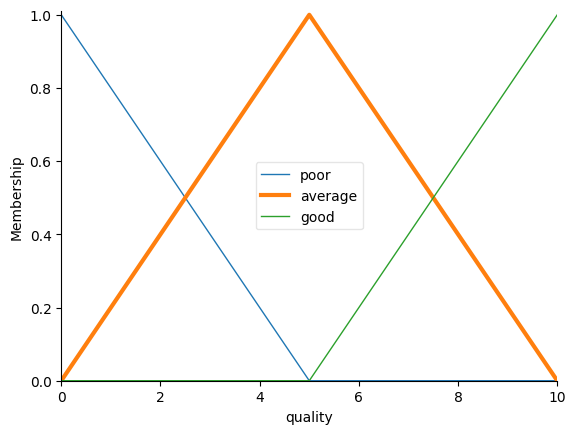

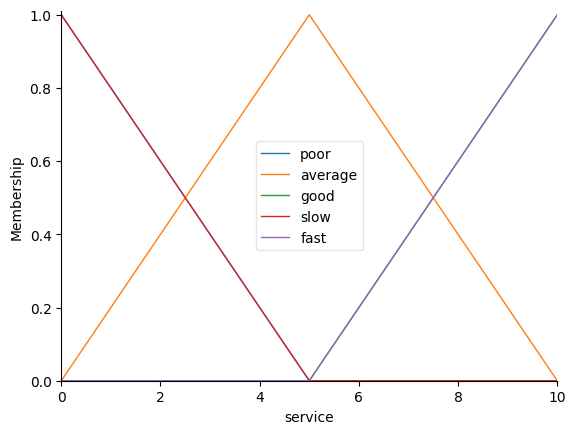

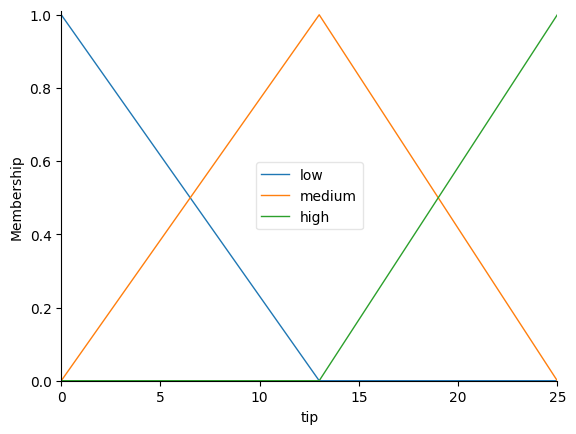

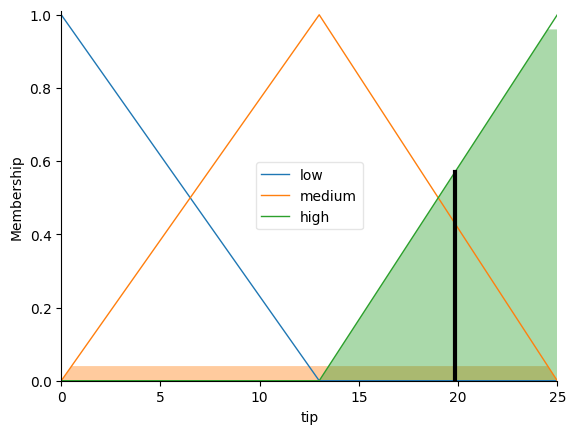

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

service['slow'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['fast'] = fuzz.trimf(service.universe, [5, 10, 10])

quality['average'].view()
service.view()
tip.view()

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Crunch the numbers
tipping.compute()

print(tipping.output['tip'])
tip.view(sim=tipping)

In [ ]:
!pip install -U pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.7 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=c273c458dbf05730cb168275236c6502fc92d2397fb26fe5710fbd1176877195
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.1 MB/s eta 0:00:00


الگوریتم فازی - برای هر هتل سه مقدار بدبینانه،خوش بینانه و متوسط رو در نظر می گیریم

46.944218357553886


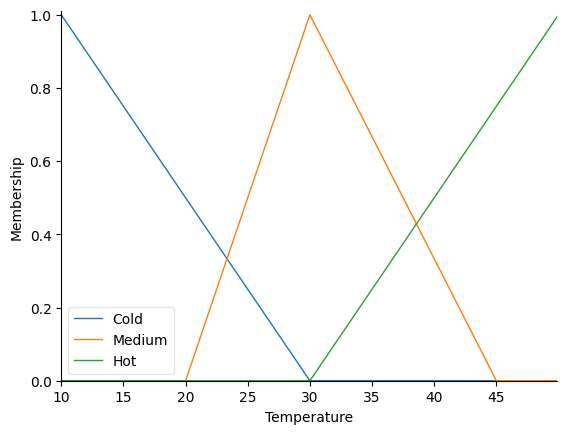

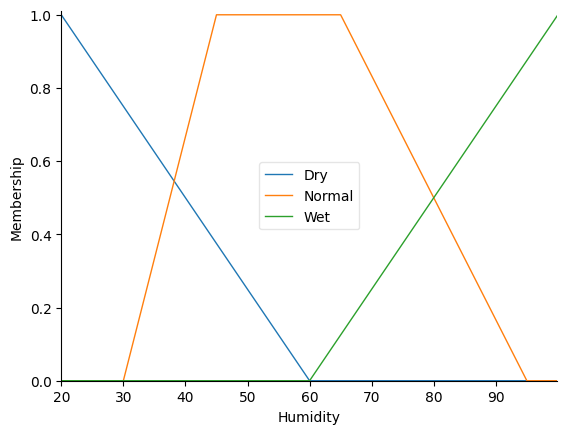

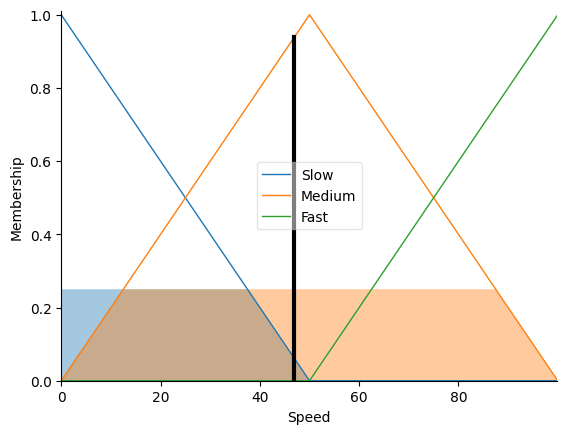

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


Temperature = ctrl.Antecedent(np.arange(10, 50, 0.1), 'Temperature')
Temperature["Cold"] = fuzz.trimf(Temperature.universe, [10, 10, 30])
Temperature["Medium"] = fuzz.trimf(Temperature.universe, [20, 30, 45])
Temperature["Hot"] = fuzz.trimf(Temperature.universe, [30, 50, 50])


Humidity = ctrl.Antecedent(np.arange(20, 100, 0.1), 'Humidity')
Humidity["Dry"] = fuzz.trimf(Humidity.universe, [20, 20, 60])
Humidity["Normal"] = fuzz.trapmf(Humidity.universe, [30, 45, 65, 95])
Humidity["Wet"] = fuzz.trimf(Humidity.universe, [60, 100, 100])

Speed = ctrl.Consequent(np.arange(0, 100, 0.1), 'Speed')
Speed["Slow"] = fuzz.trimf(Speed.universe, [0, 0, 50])
Speed["Medium"] = fuzz.trimf(Speed.universe, [0, 50, 100])
Speed["Fast"] = fuzz.trimf(Speed.universe, [50, 100, 100])

Temperature.view()
Humidity.view()



rule1 = ctrl.Rule(Temperature['Cold'] & Humidity['Wet'], Speed['Slow'])
rule2 = ctrl.Rule(Temperature['Cold'] & Humidity['Normal'], Speed['Slow'])
rule3 = ctrl.Rule(Temperature['Medium'] & Humidity['Wet'], Speed['Slow'])

rule4 = ctrl.Rule(Temperature['Cold'] & Humidity['Dry'], Speed['Medium'])
rule5 = ctrl.Rule(Temperature['Medium'] & Humidity['Wet'], Speed['Medium'])
rule6 = ctrl.Rule(Temperature['Hot'] & Humidity['Wet'], Speed['Medium'])

rule7 = ctrl.Rule(Temperature['Medium'] & Humidity['Dry'], Speed['Fast'])
rule8 = ctrl.Rule(Temperature['Hot'] & Humidity['Normal'], Speed['Fast'])
rule9 = ctrl.Rule(Temperature['Hot'] & Humidity['Dry'], Speed['Fast'])


AirCondition_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
AirCondition = ctrl.ControlSystemSimulation(AirCondition_ctrl)

AirCondition.input['Temperature'] = 25
AirCondition.input['Humidity'] = 70

AirCondition.compute()

print(AirCondition.output['Speed'])
Speed.view(sim=AirCondition)


In [ ]:
import requests

# API Key خود را اینجا وارد کنید
API_KEY = '3k_wLMNf6CwujHWVLSLnoZFLnuDLAkzBrLxfZU9GT5cG2tkgngTk3YcAD80AUOTE665dznOmk1LXWbVHFvtBehmk-ao0Dnzo7urxabgbhvXWcDzWSRNWfvoXm-cDZ3Yx'

# URL پایه برای درخواست‌ها
url = 'https://api.yelp.com/v3/businesses/SoSQhqqOaS10aUuxDr1YtA'

# سربرگ‌ها (Headers) با کلید API
headers = {
    'Authorization': f'Bearer {API_KEY}',
}

# پارامترهای جستجو (می‌توانید موقعیت جغرافیایی، نوع کسب‌وکار و غیره را مشخص کنید)
params = {
    # 'term': 'hotels',   # نوع کسب‌وکار
    'location': 'New York',  # مکان
    'limit': 5               # تعداد نتایج
}

# ارسال درخواست به Yelp API
response = requests.get(url, headers=headers, params=params)

# بررسی وضعیت درخواست و چاپ نتایج
if response.status_code == 200:
    data = response.json()
    businesses = data.get('businesses')
    print(businesses)
    # for business in businesses:
    #     print(f"Name: {business['name']}, Rating: {business['rating']}, Address: {', '.join(business['location']['display_address'])}")
else:
    print(f"Error: {response.status_code}, {response.text}")


In [ ]:
import holidays
from datetime import datetime

# map each poi to an action with a number from 0 to (#POI - 1)
def neural_poi_map():
    # POI ids
    all_poi = [42, 49, 52, 54, 58, 59, 61, 62, 63, 71, 75, 76, 201, 202, 300, 301, 302, 303]

    map_from_poi_to_action = {}  # Poi to Action
    i = 0
    for x in all_poi:
        map_from_poi_to_action[x] = i
        i += 1
    map_from_action_to_poi = {}
    for x in range(len(all_poi)):
        map_from_action_to_poi[x] = all_poi[x]
    return map_from_poi_to_action, map_from_action_to_poi

def print_date_type(date_input, df_weather, id_verona_card):
    giorni_festivi = holidays.Italy()

    # print day informations (weather, temperature, holidays)
    row_weather = df_weather.loc[df_weather['date'] == date_input.strftime('%Y-%m-%d')]
    if not row_weather.empty:
        temperatura = row_weather['temp'].iloc[0]
        condizione = str(row_weather['rain'].iloc[0])
        if condizione == "nan": condizione = "sun"
    else:
        temperatura = None
        condizione = None
    if date_input in giorni_festivi or date_input.weekday() == 6 or date_input.weekday() == 5 or date_input == datetime(
            2022, 2, 14):
        print(
            f"ID Verona Card: {id_verona_card}  Date of the visit: {date_input.strftime('%d-%m-%Y')} (public holiday)\t  Temperature°°: {temperatura}\t Weather: {condizione} ")
    else:
        print(
            f"ID Verona Card: {id_verona_card}  Date of the visit: {date_input.strftime('%d-%m-%Y')} (weekday)\t Temperature°: {temperatura}\t Weather: {condizione} ")


# Print stats about the itinerary
def print_stats(total_time_visit, total_time_distance, total_time_crowd, time_left, time_input, popular, poi_len, arp, gini, prefix=""):
    print(f"{prefix}Total time used: {total_time_visit} min")
    print(f"{prefix}Time walked: {total_time_distance} min")
    print(f"{prefix}Time in queue: {total_time_crowd} min")
    print(f"{prefix}Time left: {time_left} min")
    print(f"{prefix}Popular POI visited: {popular}")
    print(f"{prefix}ARP: {arp} ")
    print(f"{prefix}Gini: {gini} ")


    percentage_visit = total_time_visit * 100 / (time_input * 60)
    percentage_distance = total_time_distance * 100 / (time_input * 60)
    percentage_crowd = total_time_crowd * 100 / (time_input * 60)
    percentage_final = time_left * 100 / (time_input * 60)
    percentage_lost_time = percentage_distance + percentage_crowd + percentage_final
    print("{}Percentage of total time used (VT): {:3.2f}%".format(prefix,percentage_visit))
    print("{}Percentage of time walked     (MT): {:3.2f}%".format(prefix,percentage_distance))
    print("{}Percentage of time in queue   (QT): {:3.2f}%".format(prefix,percentage_crowd))
    print("{}Percentage of time left       (RT): {:3.2f}%".format(prefix,percentage_final))
    print("{}Percentage of time wasted         : {:3.2f}%".format(prefix,percentage_lost_time))

    print(f"{prefix} POI LEN = {poi_len}")

def get_weather(date_input, df_weather):
    temp = df_weather[df_weather['date'] == date_input.strftime("%Y-%m-%d")]['temp'].values[0]
    rain = df_weather[df_weather['date'] == date_input.strftime("%Y-%m-%d")]['rain'].values[0]
    return int(temp)%5, rain

def arp_measure(poi_list, itinerary_list):
    arp = 0
    for poi in poi_list:
        cont = 0
        for itinerary in itinerary_list:
            if poi in itinerary:
                cont += 1
        arp += cont / len(itinerary_list)
    return arp / len(poi_list)

def gini_measure(poi_list, itinerary_list):
    gini = 0
    for p in poi_list:
        for q in poi_list:
            if p==q:
                continue
            cont_p = 0
            cont_q = 0
            for it in itinerary_list:
                if p in it:
                    cont_p += 1
                if q in it:
                    cont_q += 1
            diff = abs(cont_p - cont_q)
            gini += diff
    return gini / (len(poi_list) * len(poi_list) * len(itinerary_list))

In [ ]:

from datetime import *
from math import ceil
import numpy as np



class poi_env:
    def __init__(self, df_poi_it, df_crowding, df_poi_time_travel):#(self, date, df_poi_it, df_crowding, df_poi_time_travel):

        self.action_space = set(df_poi_it.id)  # PoIs available
        self.state = None  # [poi,timestamp] [visited PoIs]
        self.timeleft = None
        self.explored = set()  # PoIs visited
        self.map_from_poi_to_action, self.map_from_action_to_poi = neural_poi_map()

        # dataframes
        self.df_poi_it = df_poi_it
        self.df_crowding = df_crowding
        self.df_poi_time_travel = df_poi_time_travel

        # dict : latitudine e longitudine
        # dict : poi_time_visit
        poi_position = {}
        poi_time_visit = {}
        for row in df_poi_it.itertuples():
            poi_position[row[1]] = (row[2], row[3])
            poi_time_visit[row[1]] = row[4]

        self.poi_time_visit = poi_time_visit  # time visit of each poi
        self.poi_position = poi_position  # latitudine e longitudine
        self.poi_set = set(df_poi_it.id)

        # STATS
        self.total_time_visit = 0
        self.total_time_crowd = 0
        self.total_time_distance = 0

    def reset(self, initial_poi, total_time, date):
        # reset environment
        self.action_space = self.poi_set.copy()
        self.state = np.array([initial_poi, 0])
        self.poi_date = date  # date of the tour

        self.state = np.pad(self.state, (0, len(self.poi_set)),
                            mode='constant')  # state  [0..1.....0...1] 1 if I poi 2+n-th is visited, 0 otherwise
        self.timeleft = total_time  # time still available
        self.explored = set()

        self.total_time_visit = 0
        self.total_time_crowd = 0
        self.total_time_distance = 0

        return self.state.copy()

    # Mi muovo da un poi A ad un poi B
    def step(self, poi_dest):

        # compute walking time A -> B
        time_distance = self.calc_distance(poi_dest)
        # compute waiting time B
        time_crowd = self.crowding_wait(poi_dest)
        time_left_int = self.timeleft.total_seconds() / 60

        # Calcolo time visit, se sfora tengo solo la parte di tempo che riesco ad usare
        if ((time_crowd + time_distance + self.poi_time_visit[poi_dest]) > time_left_int):
            if time_crowd + time_distance > time_left_int:
                time_visit = time_left_int
            else:
                time_visit = time_left_int - (time_crowd + time_distance)
        else:
            time_visit = self.poi_time_visit[poi_dest]

            # STATS
        self.total_time_distance += time_distance
        self.total_time_crowd += time_crowd
        self.total_time_visit += time_visit

        ##### Reward ####
        factor_base = 0
        reward = factor_base + ((time_visit)) / (time_crowd + time_distance + time_visit) * time_visit / 5

        #### State update ####
        self.action_space.remove(poi_dest)  # remove B from available PoIs
        self.explored.add(poi_dest)  # add B to visited PoIs
        self.state[0] = poi_dest  # update state of current PoI
        self.state[2 + self.map_from_poi_to_action[poi_dest]] = 1  # update state of visited PoIs

        ### Total time required
        time_total = time_distance + time_crowd + time_visit

        # Update time left
        self.timeleft = timedelta(minutes=(time_left_int - time_total))
        self.state[1] = int(self.state[1]) + int(time_total)

        # check if I visited all PoIs
        done_temp = False
        actual_act_space = self.action_space.copy()
        for poi in actual_act_space:
            self.poi_available(poi)
        if len(self.action_space) == 0:
            done_temp = True
            if self.timeleft.total_seconds() > 0:  # if time is not zero, reword is decreased
                reward = reward - self.timeleft.total_seconds() / 1200

        return self.state.copy(), reward, done_temp

    def poi_available(self, poi_dest):

        time_travel = self.calc_distance(poi_dest)
        time_queue = self.crowding_wait(poi_dest)
        minimum_time = ceil((self.poi_time_visit[
            poi_dest]) / 3)  # less than 1/3 of visit_time, no sense to visit the poi
        time_t_q = time_travel + time_queue + minimum_time

        # if the remaining time does not allow to enter the destination POI, then I remove it from the visitable ones
        if (self.timeleft.total_seconds() / 60 < time_t_q):
            self.action_space.remove(poi_dest)

    def crowding_wait(self, poi_dest):
        # find crowd range looking at day and hour
        date_c = timedelta(minutes=int(self.state[1])) + self.poi_date

        if date_c.hour < 12:
            crowd_range = date_c.replace(hour=8, minute=0, second=0)
        elif date_c.hour >= 12 and date_c.hour < 16:
            crowd_range = date_c.replace(hour=12, minute=0, second=0)
        else:
            crowd_range = date_c.replace(hour=16, minute=0, second=0)


        estimated_crowd = \
        self.df_crowding.loc[(self.df_crowding['poi'] == poi_dest) & (self.df_crowding['data'] == str(crowd_range))][
            "val_stim"].values
        # if there is no data, I assume a crowd of no queue
        if len(estimated_crowd) == 0:
            return 15
        else:
            estimated_crowd = estimated_crowd[0]
            if np.isnan(estimated_crowd):
                return 15
            # compute waiting time (tempo visita/2 * persone in coda) / capienza massima del poi
            crowd_wait = ((self.poi_time_visit[poi_dest] / 2) * estimated_crowd) / \
                         self.df_poi_it.loc[(self.df_poi_it['id'] == poi_dest)]["max_crowd"].values[0]
            # ret minutes
            return ceil(crowd_wait)

    def calc_distance(self, poi_dest):
        # compute walking time A -> B
        df_tmp = self.df_poi_time_travel.loc[(self.df_poi_time_travel['poi_start'] == self.state[0])]
        df_tmp = df_tmp.loc[(df_tmp['poi_dest'] == poi_dest)]
        return int(df_tmp.to_numpy()[0][2])

    def time_stats(self):
        return self.total_time_visit, self.total_time_distance, self.total_time_crowd, self.timeleft.total_seconds() / 60

    def current_time(self):
        return timedelta(minutes=int(self.state[1])) + self.poi_date

In [ ]:
import numpy as np
import pandas as pd
import random
from tensorflow import keras
from tensorflow.keras import layers
from datetime import *
import time
from collections import deque



#############################################
################ LOAD # DATA ################
#############################################

# Latitude, Longitude, Time visit
df_poi_it = pd.read_csv('/content/drive/MyDrive/data/poi_it.csv', usecols=['id', 'latitude', 'longitude', 'Time_Visit', 'max_crowd'])

# POI occupation grouped by day and time slots
df_crowding = pd.read_csv('/content/drive/MyDrive/data/log_crowd.csv', usecols=['data', 'val_stim', 'poi']).sort_values(by=['data', 'poi'])

# Time travel in minutes of each pair of poi
df_poi_time_travel = pd.read_csv('/content/drive/MyDrive/data/poi_time_travel.csv', usecols=['poi_start', 'poi_dest', 'time_travel'])

# weather contidion during 2022 [temperature,rain]
df_weather = pd.read_csv('/content/drive/MyDrive/data/weather_2022_processed.csv',usecols=['date','temp','rain'])
df_weather_test = pd.read_csv('/content/drive/MyDrive/data/weather_2023_processed.csv',usecols=['date','temp','rain'])

# data_all contains user visits
df_poi_train = pd.read_csv('/content/drive/MyDrive/data/data_train_first_part.csv',
                            usecols=["id_veronacard","profilo","data_visita","ora_visita","sito_nome","poi"]).sort_values(
    ['id_veronacard', 'data_visita', 'ora_visita'])

df_poi_test = pd.read_csv('/content/drive/MyDrive/data/data_2023.csv',
                            usecols=["id_veronacard","profilo","data_visita","ora_visita","sito_nome","poi"]).sort_values(
    ['id_veronacard', 'data_visita', 'ora_visita'])

# POI popularity
df_poi_popularity = pd.read_csv('/content/drive/MyDrive/data/poi_popularity_train.csv', usecols=['poi', 'popularity','position'])
df_poi_popularity_context = pd.read_csv('/content/drive/MyDrive/data/poi_popularity_ctx_train.csv', usecols=['temp','rain','poi','popularity','position'])

df_poi_popularity_test = pd.read_csv('/content/drive/MyDrive/data/poi_popularity_2023.csv', usecols=['poi', 'popularity','position'])
df_poi_popularity_context_test = pd.read_csv('/content/drive/MyDrive/data/poi_popularity_ctx_2023.csv', usecols=['temp','rain','poi','popularity','position'])

popular_poi = df_poi_popularity.sort_values(by=['popularity'], ascending=False)['poi'].values[:3]

# map POI->action
map_from_poi_to_action, map_from_action_to_poi = neural_poi_map()

def initialization_dn(layer_size, input_layer, output_layer):
    model = keras.Sequential()
    model.add(layers.Dense(layer_size, input_dim=input_layer, activation="relu"))  # input layer + 1 hidden layer
    model.add(layers.Dense(layer_size, activation="relu"))  # 2
    model.add(layers.Dense(layer_size, activation="relu"))  # 3
    model.add(layers.Dense(layer_size, activation="relu"))  # 4
    model.add(layers.Dense(layer_size, activation="relu"))  # 5
    # model.add(layers.Dense(layer_size, activation="relu")) #6
    model.add(layers.Dense(output_layer, activation="linear"))  # output layer
    model.compile(loss="mean_squared_error", optimizer='adam')
    return model


def train_model(model, memory, batch_size, poi_set_len, last_set, gamma=0.96):
    size = min(batch_size, len(memory))
    mb = random.sample(memory, size)

    for [s, a, s_1, r, done, s_act_space, s1_act_space] in mb:
        state = s.reshape(1, poi_set_len + 2)
        target = model.predict(state, verbose=0)
        target = target[0]
        for i in range(poi_set_len):
            if map_from_action_to_poi[i] not in s_act_space:
                target[i] = 0
        if done == True:
            target[a] = r
        else:
            state_1 = s_1.reshape(1, poi_set_len + 2)
            predict_state_1 = model.predict(state_1, verbose=0)[0]
            for i in range(poi_set_len):
                if map_from_action_to_poi[i] not in s1_act_space:
                    predict_state_1[i] = 0
            max_q = max(predict_state_1)
            target[a] = r + max_q * gamma
        model.fit(state, np.array([target]), epochs=15, verbose=0)

    return model


def DQN(environment, neural_network, trials, batch_size, time_input, poi_start, date_input,
        experience_buffer, epsilon_decay=0.997):

    if len(experience_buffer) > 100:
        experience_buffer = random.sample(experience_buffer, 100)
    epsilon = 1
    epsilon_min = 0.01
    score = 0
    score_queue = []
    score_max = 0
    best_journey = []
    best_trial = -1

    for trial in range(trials):
        s = environment.reset(poi_start, timedelta(hours=time_input), date_input)
        s_act_space = environment.action_space.copy()
        done = False
        score = 0
        visited_poi = []

        while done == False:  # check if all actions are done
            if np.random.random() < epsilon:
                a = random.choices(list(environment.action_space), k=1)[0]

            else:
                state = s.reshape(1, len(environment.poi_set) + 2)
                prediction = neural_network.predict(state, verbose=0)
                for i in range(len(environment.poi_set)):
                    if map_from_action_to_poi[i] not in environment.action_space:
                        prediction[0][i] = -1000000
                a_index = prediction.argmax()
                a = map_from_action_to_poi[a_index]
            visited_poi.append(a)
            epsilon = max(epsilon_min, epsilon * epsilon_decay)
            s_1, r, done = environment.step(a)
            a = map_from_poi_to_action[a]
            s1_act_space = environment.action_space.copy()
            experience_buffer.append([s, a, s_1, r, done, s_act_space, s1_act_space])
            last_set = [s, a, s_1, r, done, s_act_space, s1_act_space]
            train_model(neural_network, experience_buffer, batch_size, len(environment.poi_set), last_set)
            s = s_1
            score += r
            s_act_space = s1_act_space.copy()

        if score > score_max:
            score_max = score
            best_journey = visited_poi.copy()
            best_trial = trial
        score_queue.append(score)

        print(f"Path from episode: {trial}  =  {visited_poi}")
        print("Episode: {:7.0f}, Score: {}, EPS: {:3.2f}".format(trial, score_queue[trial], epsilon))

    print("\n\n")
    print(f"[DRL] The better POI sequence is: {best_journey}")
    print(f"[DRL] Reward: {score_max}")
    print(f"[DRL] Episode number: {best_trial}")

    return neural_network, score_queue, best_journey

def context_distance_popularity_baseline(date_input, df_weather, time_input, poi_start, context=False):
    if context:
        str_summary = "BCDP"
        poi_popularity_ctx = df_poi_popularity_context.copy()
    else:
        str_summary = "BDP"
        poi_popularity = df_poi_popularity.copy()

        # choose the nearest and most popular POI to vist untile time is over

    done = False
    poi_len = 0

    # Initialization of the environment -> reset for each date
    env = poi_env(df_poi_it,df_crowding,df_poi_time_travel)
    env.reset(poi_start , timedelta( hours = time_input ) ,date_input)
    visited_poi = [poi_start]
    reward = 0

    if context:
        temp, rain = get_weather(date_input, df_weather)
        poi_popularity = poi_popularity_ctx[(poi_popularity_ctx['temp'] == temp) &
                                            (poi_popularity_ctx['rain'] == rain)]

    while done==False:   # check if all possible actions are done
            #last poi visited
            last_poi_visited = env.state[0]
            distance_poi = df_poi_time_travel[(df_poi_time_travel['poi_start'] == last_poi_visited) &
                                                (df_poi_time_travel['poi_dest'] != last_poi_visited) & df_poi_time_travel['poi_dest'].isin(env.action_space)].copy()
            distance_values = list(distance_poi['time_travel'].drop_duplicates().sort_values())

            distance_poi['points'] = distance_poi['time_travel'].apply(lambda x: distance_values.index(x)+1)
            distance_poi.rename(columns={'poi_dest': 'poi'}, inplace=True)
            choiche_poi = pd.merge(distance_poi, poi_popularity, on='poi', how='left')
            choiche_poi['tot'] = choiche_poi['points'] + choiche_poi['position']
            choiche_poi = choiche_poi.sort_values(by=['tot'], ascending=True)

            a = choiche_poi['poi'].values[0]

            _ , r, done = env.step(a)
            reward += r
            poi_len += 1
            visited_poi.append(a)

    total_time_visit, total_time_distance, total_time_crowd, time_left=env.time_stats()

    popular_poi_visited = len(set(visited_poi) & set(popular_poi))

    return reward, total_time_visit, total_time_distance, total_time_crowd, time_left, poi_len, popular_poi_visited, visited_poi

#############################################
############ TRAINING EXPBUFFER #############
#############################################

print("\n################## EXP BUFFER ##################\n")

df_poi_h = df_poi_train.copy()
print(f"Number of sample: {len(df_poi_h)}")

# Grouped by Verona card and date of visit
grouped_df_h = df_poi_h.groupby(['id_veronacard', 'data_visita'])

# Initialization of the environment
env_h = poi_env(df_poi_it, df_crowding, df_poi_time_travel)

# One experience buffer for each context
poi_exp_b = df_poi_it['id'].values.astype(str).tolist()
time_input_exp_b =  [str(x) for x in range(0, 6)]
rain_exp_b = ['rain', 'no_rain']
temp_exp_b = [str(x) for x in range(0, 5)]

df_key_exp_buffer_h = pd.DataFrame({'poi': poi_exp_b})
df_key_exp_buffer_h = df_key_exp_buffer_h.merge( pd.DataFrame({'time':time_input_exp_b}), how='cross')
df_key_exp_buffer_h = df_key_exp_buffer_h.merge( pd.DataFrame({'temp':temp_exp_b}), how='cross')
df_key_exp_buffer_h = df_key_exp_buffer_h.merge( pd.DataFrame({'rain':rain_exp_b}), how='cross')

exp_buffer_h = {}
for i in range(len(df_key_exp_buffer_h)):
    exp_buffer_h['+'.join(df_key_exp_buffer_h.loc[i].tolist())] = deque(maxlen=700)

#ctx_experience_buffer_h = {[]:deque(maxlen=700)}

print(f"Number of users: {len(grouped_df_h)}")
i_train = 0
for (group_id, group_date), group_data in grouped_df_h:
    poi_start_h = group_data['poi'].iloc[0]
    date_input_h = datetime.strptime(group_date, '%Y-%m-%d')

    # reset environment for each new user
    state = env_h.reset(poi_start_h, timedelta(hours=14), date_input_h)
    relative_start_time = 0
    insertable = True
    first_visit_time = None
    last_visit_time = None

    poi_len = 0

    for index, row in group_data.iterrows():
        if first_visit_time is None:
            first_visit_time = datetime.strptime(row['ora_visita'], '%H:%M:%S')
            last_visit_time = datetime.strptime(row['ora_visita'], '%H:%M:%S')
            last_poi = row['poi']
        else:
            last_visit_time = datetime.strptime(row['ora_visita'], '%H:%M:%S')
            last_poi = row['poi']
    time_input_h = (last_visit_time + timedelta(minutes=env_h.poi_time_visit[last_poi])).hour - first_visit_time.hour

    #'303+10+2+no_rain'
    #poi+time/2+temp+rain
    temp_h, rain_h = get_weather(date_input_h, df_weather)
    key_exp_buff = '+'.join([str(poi_start_h), str(int(time_input_h/2)), str(temp_h), str(rain_h)])
    if len(exp_buffer_h[key_exp_buff]) >= 200:
        continue
    for index, row in group_data.iterrows():
        if (row['poi'] not in env_h.explored):
            act_space = env_h.action_space.copy()

            new_state, reward, done = env_h.step(row['poi'])
            act_space_2 = env_h.action_space.copy()
            a = map_from_poi_to_action[row['poi']]
            exp_buffer_h[key_exp_buff].append([state, a, new_state, reward, done, act_space, act_space_2])
            state = new_state

    env_h.timeleft = timedelta(minutes=0)  # reset time left for each real user, he or she has no more time for visits

    exit = True
    for v in exp_buffer_h.values():
        if len(v) < 100:#--> finire quando arrivo almeno a 100 per ogni contesto
            exit = False

    if exit:
        print('\nEnxperience buffer filled for all context\n')
        break

    i_train += 1

    if i_train % 1000 == 0:
        print(f"Processed {i_train}/{len(grouped_df_h)} - {i_train/len(grouped_df_h)*100}")


#############################################
################# BASELINES #################
#############################################

print("\n################## BASELINES ##################\n")

### Load historical data
df_poi_h = df_poi_test.copy()

itinerary_h = pd.DataFrame(columns=['id_veronacard', 'itinerary', 'reward', 'time_visit', 'time_distance',
                                    'time_crowd', 'time_left', 'time_input', 'popular_poi_visited', 'poi_len'])
itinerary_dp = pd.DataFrame(columns=['id_veronacard', 'itinerary', 'reward', 'time_visit', 'time_distance',
                                     'time_crowd', 'time_left', 'time_input', 'popular_poi_visited', 'poi_len'])
itinerary_cdp = pd.DataFrame(columns=['id_veronacard', 'itinerary', 'reward', 'time_visit', 'time_distance',
                                      'time_crowd', 'time_left', 'time_input', 'popular_poi_visited', 'poi_len'])
itinerary_dqn = pd.DataFrame(columns=['id_veronacard', 'itinerary', 'reward', 'best_reward','time_visit', 'time_distance',
                                      'time_crowd', 'time_left', 'time_input', 'popular_poi_visited', 'poi_len','time_process'])

global_reward_h = global_reward_cdp = global_reward_dp = global_reward_dqn = global_best_reward_dqn = 0
global_total_time_visit_h = global_total_time_visit_cdp = global_total_time_visit_dp = global_total_time_visit_dqn = 0
global_total_time_distance_h = global_total_time_distance_cdp = global_total_time_distance_dp = global_total_time_distance_dqn = 0
global_total_time_crowd_h = global_total_time_crowd_cdp = global_total_time_crowd_dqn = global_total_time_crowd_dp = 0
global_time_left_h = global_time_left_cdp = global_time_left_dp = global_time_left_dqn = 0
global_poi_len_h = global_poi_len_cdp = global_poi_len_dqn = global_poi_len_dp = 0
popular_poi_visited_h = global_popular_poi_visited_cdp = global_popular_poi_visited_dp = global_popular_poi_visited_dqn =  0

global_time_process_dqn = 0
global_time_h = 0
i_h = i_dqn = 0

# Grouped by Verona card and date of visit
grouped_df_h = df_poi_h.groupby(['id_veronacard', 'data_visita'])
len_vc = len(grouped_df_h)
print(f"Number of sample: {len_vc}")
# Initialization of the environment
env_h = poi_env(df_poi_it, df_crowding, df_poi_time_travel)

for (group_id, group_date), group_data in grouped_df_h:
    if len(list(group_data['poi'].values)) != len(set(group_data['poi'].values)): #check if there are duplicates
        continue
    poi_start = group_data['poi'].iloc[0]

    date_input = datetime.strptime(group_date, "%Y-%m-%d")

    # reset environment for each new user
    state = env_h.reset(poi_start, timedelta(hours=14), date_input)
    reward_tot = 0
    relative_start_time = 0
    insertable = True
    first_visit_time = None
    last_visit_time = None

    poi_len = 0

    for index, row in group_data.iterrows():
        poi_len += 1
        if (row['poi'] not in env_h.explored):

            if first_visit_time is None:
                first_visit_time = datetime.strptime(row['ora_visita'], '%H:%M:%S')
                last_visit_time = datetime.strptime(row['ora_visita'], '%H:%M:%S')
                last_poi = row['poi']

                env_h.state[1] = relative_start_time
            else:
                last_visit_time = datetime.strptime(row['ora_visita'], '%H:%M:%S')
                last_poi = row['poi']

            act_space = env_h.action_space.copy()
            # print(state)
            # print(act_space)
            new_state, reward, done = env_h.step(row['poi'])

            act_space_2 = env_h.action_space.copy()
            a = map_from_poi_to_action[row['poi']]
            state = new_state
            reward_tot += reward
    env_h.timeleft = timedelta(minutes=0)  # reset time left for each real user, he or she has no more time for visits

    time_input = (last_visit_time + timedelta(minutes=env_h.poi_time_visit[last_poi])).hour - first_visit_time.hour

    total_time_visit_h, total_time_distance_h, total_time_crowd_h, time_left_h = env_h.time_stats()

    itinerary_h.loc[i_h] = [group_id, list(group_data['poi'].values), reward_tot, total_time_visit_h, total_time_distance_h, total_time_crowd_h, time_left_h, time_input, len(set(env_h.explored) & set(popular_poi)), poi_len]

    global_total_time_visit_h += total_time_visit_h
    global_total_time_distance_h += total_time_distance_h
    global_total_time_crowd_h += total_time_crowd_h
    global_time_left_h += time_left_h
    #global_time_h += total_time_distance_h + total_time_crowd_h + total_time_visit_h
    global_time_h += time_input*60

    visited_poi = env_h.explored.copy()
    popular_poi_visited_h += len(set(visited_poi) & set(popular_poi))

    global_reward_h += reward_tot
    i_h += 1
    global_poi_len_h += poi_len

    #at this point evaluate the historical path, use the same start poi, time and date to query other baselines

    ################### DQN ###################

    # Initialization of the environment
    env_dqn = poi_env(df_poi_it,df_crowding,df_poi_time_travel)
    start_state_dqn = env_dqn.reset(poi_start, timedelta( hours = time_input ) , date_input)

    # Initialization of the neural network
    neural_network = initialization_dn(layer_size=15, input_layer=20, output_layer=18)

    # run DQN algorithm (deep q learning)

    temp, rain = get_weather(date_input, df_weather_test)
    key_exp_buff = '+'.join([str(poi_start), str(int(time_input/2)), str(temp), str(rain)])
    experience_buffer_h = exp_buffer_h[key_exp_buff]

    if experience_buffer_h == 'DONE':
        continue
    else:
        i_dqn += 1

    experience_buffer_dqn = experience_buffer_h
    start_dqn = time.time()
    neural_network, score_dqn, best_journey = DQN(env_dqn, neural_network, 300, 32, time_input, poi_start, date_input, experience_buffer_dqn)
    time_process_dqn = time.time() - start_dqn
    reward_dqn = np.array([score_dqn]).mean()
    best_reward_dqn = np.array([score_dqn]).max()
    global_reward_dqn += reward_dqn
    global_best_reward_dqn += best_reward_dqn

    exp_buffer_h[key_exp_buff] = 'DONE'

    total_time_visit_dqn, total_time_distance_dqn, total_time_crowd_dqn, time_left_dqn=env_dqn.time_stats()
    popular_poi_visited_dqn = len(set(best_journey) & set(popular_poi))
    global_popular_poi_visited_dqn += popular_poi_visited_dqn
    global_total_time_visit_dqn += total_time_visit_dqn
    global_total_time_distance_dqn += total_time_distance_dqn
    global_total_time_crowd_dqn += total_time_crowd_dqn
    global_time_left_dqn += time_left_dqn
    global_time_process_dqn += time_process_dqn

    itinerary_dqn.loc[i_dqn] = [group_id, list(best_journey), reward_dqn, best_reward_dqn, total_time_visit_dqn, total_time_distance_dqn, total_time_crowd_dqn,
                             time_left_dqn, time_input, popular_poi_visited_dqn, len(best_journey), time_process_dqn]


    ########## DISTANCE-P # BASELINE ##########

    reward_dp, total_time_visit_dp, total_time_distance_dp, total_time_crowd_dp, time_left_dp, poi_len_dp, popular_poi_visited_dp, poi_visited_dp = context_distance_popularity_baseline(date_input, df_weather_test, time_input, poi_start, False)

    itinerary_dp.loc[i_h] = [group_id, poi_visited_dp, reward_dp, total_time_visit_dp, total_time_distance_dp, total_time_crowd_dp, time_left_dp, time_input, popular_poi_visited_dp, poi_len_dp]

    global_reward_dp += reward_dp
    global_total_time_visit_dp += total_time_visit_dp
    global_total_time_distance_dp += total_time_distance_dp
    global_total_time_crowd_dp += total_time_crowd_dp
    global_time_left_dp += time_left_dp
    global_poi_len_dp += poi_len_dp
    global_popular_poi_visited_dp += popular_poi_visited_dp


    ######### CTX-DISTANCE-P # BASELINE #########

    reward_cdp, total_time_visit_cdp, total_time_distance_cdp, total_time_crowd_cdp, time_left_cdp, poi_len_cdp, popular_poi_visited_cdp, poi_visited_cdp = context_distance_popularity_baseline(date_input, df_weather_test, time_input, poi_start, True)

    itinerary_cdp.loc[i_h] = [group_id, poi_visited_cdp, reward_cdp, total_time_visit_cdp, total_time_distance_cdp, total_time_crowd_cdp, time_left_cdp, time_input, popular_poi_visited_cdp, poi_len_cdp]

    global_reward_cdp += reward_cdp
    global_total_time_visit_cdp += total_time_visit_cdp
    global_total_time_distance_cdp += total_time_distance_cdp
    global_total_time_crowd_cdp += total_time_crowd_cdp
    global_time_left_cdp += time_left_cdp
    global_poi_len_cdp += poi_len_cdp
    global_popular_poi_visited_cdp += popular_poi_visited_cdp

    if i_h % 100 == 0:
        print(f'Processed {i_h}/{len_vc} users')


# itinerary_h.to_csv('../itineraries/itinerary_h.csv', index=False)
# itinerary_dp.to_csv('../itineraries/itinerary_dp.csv', index=False)
# itinerary_cdp.to_csv('../itineraries/itinerary_cdp.csv', index=False)
# itinerary_dqn.to_csv('../itineraries/itinerary_dqn.csv', index=False)

list_poi = list(df_poi_it['id'].values)
arp_h = arp_measure(list_poi, list(itinerary_h['itinerary'].values))
gini_h = gini_measure(list_poi, list(itinerary_h['itinerary'].values))

arp_dp = arp_measure(list_poi, list(itinerary_dp['itinerary'].values))
gini_dp = gini_measure(list_poi, list(itinerary_dp['itinerary'].values))

arp_cdp = arp_measure(list_poi, list(itinerary_cdp['itinerary'].values))
gini_cdp = gini_measure(list_poi, list(itinerary_cdp['itinerary'].values))

arp_dqn = arp_measure(list_poi, list(itinerary_dqn['itinerary'].values))
gini_dqn = gini_measure(list_poi, list(itinerary_dqn['itinerary'].values))


print(f"\n\tB-History SUM UP")
print(f"[BH SUM UP] AVG Reward: {global_reward_h/i_h}")
print_stats(global_total_time_visit_h/i_h, global_total_time_distance_h/i_h,
            global_total_time_crowd_h/i_h, global_time_left_h/i_h,
            global_time_h/i_h/60, popular_poi_visited_h/i_h, global_poi_len_h/i_h, arp_h, gini_h, '[BH SUM UP] ')

print(f"\n\tB-Distance+Popularity SUM UP")
print(f"[BDP SUM UP] AVG Reward: {global_reward_dp/i_h}")
print_stats(global_total_time_visit_dp/i_h, global_total_time_distance_dp/i_h,
            global_total_time_crowd_dp/i_h, global_time_left_dp/i_h,
            global_time_h/i_h/60,global_popular_poi_visited_dp/i_h, global_poi_len_dp/i_h, arp_dp, gini_dp,"[BDP SUM UP] ")

print(f"\n\tB-Context+Distance+Popularity SUM UP")
print(f"[BCDP SUM UP] AVG Reward: {global_reward_cdp/i_h}")
print_stats(global_total_time_visit_cdp/i_h, global_total_time_distance_cdp/i_h,
            global_total_time_crowd_cdp/i_h, global_time_left_cdp/i_h,
            global_time_h/i_h/60,global_popular_poi_visited_cdp/i_h, global_poi_len_cdp/i_h, arp_cdp, gini_cdp, "[BCDP SUM UP] ")

print(f"\n\tB-DQN SUM UP")
print(f"[BDQN SUM UP] AVG Reward: {global_reward_dqn/i_dqn}")
print(f"[BDQN SUM UP] AVG Best Reward: {global_best_reward_dqn/i_dqn}")
print_stats(global_total_time_visit_dqn/i_dqn, global_total_time_distance_dqn/i_dqn,
            global_total_time_crowd_dqn/i_dqn, global_time_left_dqn/i_dqn,
            global_time_h/i_h/60,global_popular_poi_visited_dqn/i_dqn, global_poi_len_dqn/i_dqn, arp_dqn, gini_dqn, "[BDQN SUM UP] ")
print(f'[BDQN SUM UP] Time process: {global_time_process_dqn/i_dqn}')


Knowledge-Based Recommender System

In [ ]:
import pandas as pd
import kagglehub

# Download dataset
path = kagglehub.dataset_download("abhijitdahatonde/zomato-restaurants-dataset")

# Load and inspect data
df = pd.read_csv(path + "/zomato.csv")
print("Dataset Shape:", df.shape)
df.head()

# Adjusting feature selection based on actual dataset column names
relevant_features = ['restaurant name', 'restaurant type', 'rate (out of 5)',
                     'num of ratings', 'avg cost (two people)', 'cuisines type', 'area']
df = df[relevant_features]

# Drop rows with missing values
df.dropna(inplace=True)
df.head()


def get_recommendations(preferences, data):
    """
    Filters items based on user preferences.

    Parameters:
    - preferences: A dictionary containing user-defined feature preferences
    - data: The DataFrame containing restaurant data

    Returns:
    - DataFrame: Filtered items matching the preferences
    """
    filtered_data = data.copy()  # Start with a copy of the dataset
    for feature, value in preferences.items():  # Iterate over each preference
        if value:  # Only apply filtering if a preference is specified
            if feature == 'cuisines type':
                # For cuisines, use contains for flexible matching
                filtered_data = filtered_data[filtered_data[feature].str.contains(value, case=False, na=False)]
            else:
                filtered_data = filtered_data[filtered_data[feature] == value]
    return filtered_data

# Define user preferences
user_preferences = {
    'restaurant type': 'Casual Dining',      # Example preference for restaurant type
    'cuisines type': 'Italian',              # Preferred cuisine
    'area': 'Indiranagar'                    # Location preference
}

# Get recommendations based on preferences
recommendations = get_recommendations(user_preferences, df)

# Display recommendations
print("Recommended Restaurants:")
recommendations.head()

100%|██████████| 181k/181k [00:00<00:00, 526kB/s]

Extracting files...
Dataset Shape: (7105, 12)
Recommended Restaurants:


,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),cuisines type,area
900,Bologna,Casual Dining,4.5,717,1000.0,Italian,Indiranagar
969,Bricklane,Casual Dining,4.2,1633,1500.0,"Italian, Mediterranean, Pizza",Indiranagar
2209,Foodhall,Casual Dining,4.0,111,1000.0,"Italian, Bakery, Fast Food",Indiranagar
4768,Portland Steakhouse & Cafe,Casual Dining,4.3,2039,1500.0,"Steak, Italian, Continental, American, Burger,...",Indiranagar
4779,Power House Pitstsa,Casual Dining,2.8,40,800.0,"Continental, Burger, Desserts, Sandwich, Itali...",Indiranagar
